In [8]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf

In [9]:
data1=pd.read_csv("NewspaperData.csv")
data1.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


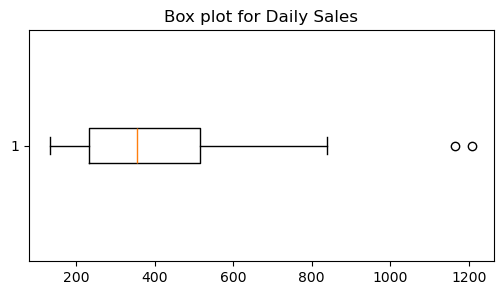

In [10]:
plt.figure(figsize=(6,3))
plt.title("Box plot for Daily Sales")
plt.boxplot(data1["daily"],vert=False)
plt.show()

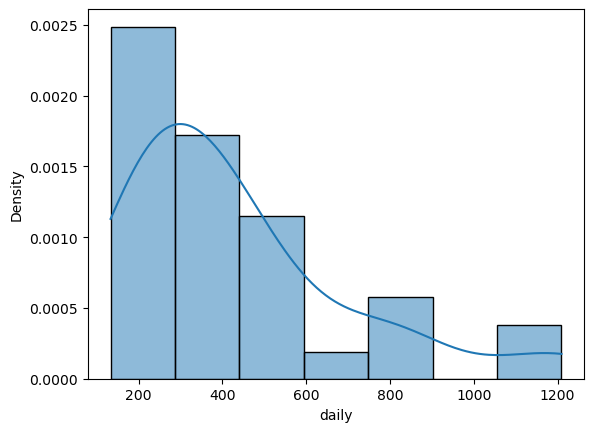

In [11]:
sns.histplot(data1['daily'],kde=True,stat='density')
plt.show()

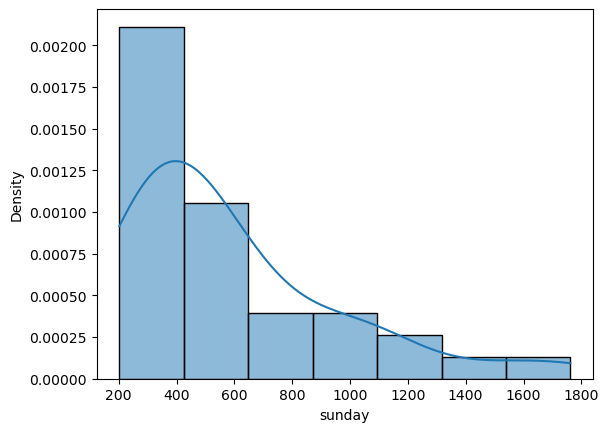

In [12]:
sns.histplot(data1['sunday'],kde=True,stat='density')
plt.show()

Observations

    There are no missing values
    The daily column values appear to be right-skewed
    The sunday column values also appear to be right-skewed
    There are two outliers in both daily column and also in sunday column as observed from the graph

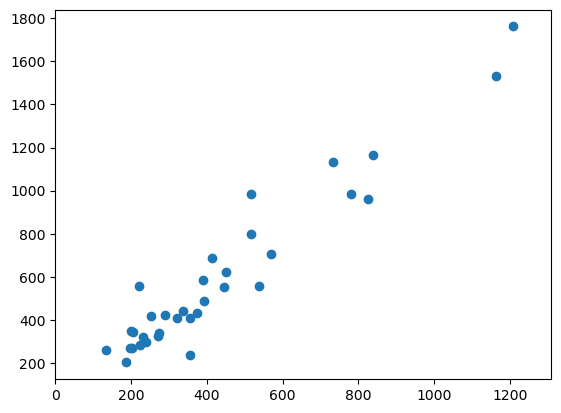

In [14]:
x=data1["daily"]
y=data1["sunday"]
plt.scatter(data1["daily"],data1["sunday"])
plt.xlim(0,max(x)+100)
plt.xlim(0,max(x)+100)
plt.show()

In [15]:
data1["daily"].corr(data1["sunday"])

0.9581543140785462

In [16]:
data1.corr(numeric_only=True)

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


Observations on Corrleation strength

    The relationship between x(daily) and y(sunday) is seen to be linear as seen from scatter plot
    The correlation is strong and positive with pearson's correlation coefficient of 0.958154

Fit a Linear Regression Model

In [19]:
import statsmodels.formula.api as smf
model1=smf.ols("sunday~daily",data = data1).fit()

In [22]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Tue, 04 Feb 2025   Prob (F-statistic):           6.02e-19
Time:                        10:56:39   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretation:
* R-squared = 1-Perfect fit (all variance explained)
* R-squared = 0-Model does not explain any variance
* R-squared close to 1-Good model fit
* R-squared close to 0-poor model fit

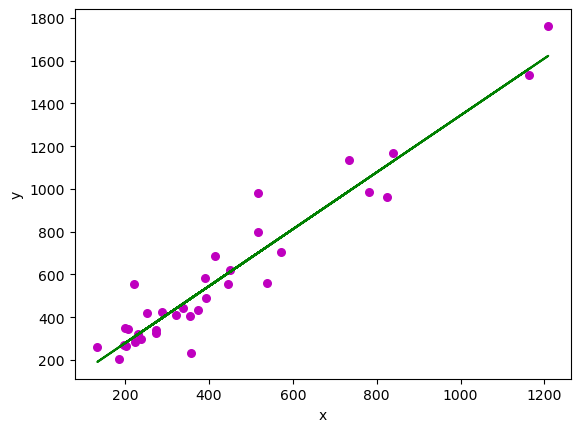

In [30]:
x = data1["daily"].values
y = data1["sunday"].values
plt.scatter(x,y,color = "m",marker = "o", s = 30)
b0 = 13.84
b1 = 1.33
y_hat = b0 +b1*x
plt.plot(x, y_hat, color = "g")
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Obervations from model summary:
* The probability(p-value) for intercept(beta_0) is 0.707 > 0.05
* Therefore the intercept coefficient may not be that much significant in prediction
* However the p_value for "daily" (beta_1) is 0.00 < 0.05
* Therefore the beta_1 coefficient is highly
significant and is cuntributint to prediction

In [35]:
model1.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [37]:
print(f'model t-values:\n{model1.tvalues}\n------------------\nmodel p-values: \n{model1.pvalues}')

model t-values:
Intercept     0.386427
daily        18.934840
dtype: float64
------------------
model p-values: 
Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [39]:
(model1.rsquared,model1.rsquared_adj)

(0.9180596895873294, 0.9154990548869335)

In [41]:
newdata=pd.Series([200,300,1500])

In [43]:
data_pred=pd.DataFrame(newdata,columns=['daily'])
data_pred

,daily
0,200
1,300
2,1500


In [45]:
model1.predict(data_pred)

0     281.778581
1     415.750057
2    2023.407766
dtype: float64

In [47]:
#Predict on all given training data
pred = model1.predict(data1["daily"])
pred

0      538.939509
1      706.442705
2      490.275710
3      333.431284
4      734.307432
5      996.884826
6      280.213795
7      352.279731
8      290.090172
9      323.546868
10     616.379041
11     400.438457
12     262.668890
13    1573.783417
14     609.447357
15     566.965002
16     378.613164
17    1061.219269
18    1633.852208
19    1119.786239
20     313.594128
21     489.224034
22     704.489401
23     309.195844
24     466.219792
25     277.920203
26     192.337885
27     514.901007
28     380.708478
29     777.960698
30     538.047259
31     284.270451
32     444.722729
33    1137.725020
dtype: float64

In [49]:
# Add predicted values as a column in data1
data1["Y_hat"] = pred
data1

,Newspaper,daily,sunday,Y_hat
0,Baltimore Sun,391.952,488.506,538.939509
1,Boston Globe,516.981,798.298,706.442705
2,Boston Herald,355.628,235.084,490.275710
3,Charlotte Observer,238.555,299.451,333.431284
4,Chicago Sun Times,537.780,559.093,734.307432
5,Chicago Tribune,733.775,1133.249,996.884826
6,Cincinnati Enquirer,198.832,348.744,280.213795
7,Denver Post,252.624,417.779,352.279731
8,Des Moines Register,206.204,344.522,290.090172
9,Hartford Courant,231.177,323.084,323.546868


In [51]:
#Compute the error values (residuals) and add as another column
data1["residuals"] = data1["sunday"]-data1["Y_hat"]
data1

,Newspaper,daily,sunday,Y_hat,residuals
0,Baltimore Sun,391.952,488.506,538.939509,-50.433509
1,Boston Globe,516.981,798.298,706.442705,91.855295
2,Boston Herald,355.628,235.084,490.275710,-255.191710
3,Charlotte Observer,238.555,299.451,333.431284,-33.980284
4,Chicago Sun Times,537.780,559.093,734.307432,-175.214432
5,Chicago Tribune,733.775,1133.249,996.884826,136.364174
6,Cincinnati Enquirer,198.832,348.744,280.213795,68.530205
7,Denver Post,252.624,417.779,352.279731,65.499269
8,Des Moines Register,206.204,344.522,290.090172,54.431828
9,Hartford Courant,231.177,323.084,323.546868,-0.462868


In [53]:
mse = np.mean((data1["daily"]-data1["Y_hat"])**2)
rmse = np.sqrt(mse)
print("MSE: ",mse)
print("RMSE: ",rmse)

MSE:  33794.87469205266
RMSE:  183.83382358002746


#### Asumptions in linear simple linear regression
1. **Linearity:** The relationship between the predictors and the response is linear.
2. **Independence:** Observations are independent of each other.
3. **Homoscedasticity:** The residuals (Y - Y_hat) exhibit constant variance at all levels of the prediction
4. **Normal distribution of errors:** The residuals (errors) of the model are normally distributed.

In [63]:
mse = np.mean(np.abs(data1["daily"]-data1["Y_hat"]))
mse

160.23994117647064

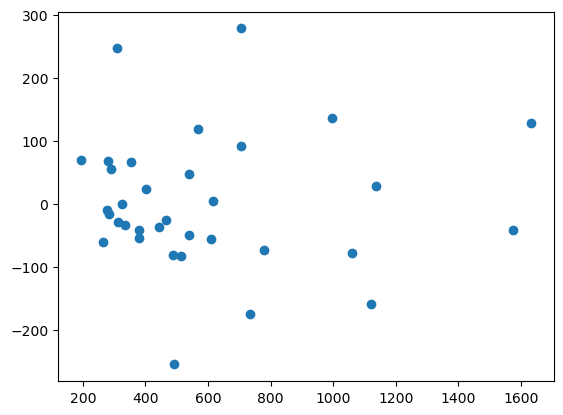

In [58]:
plt.scatter(data1["Y_hat"], data1["residuals"])

### Observations:
* There appears to be npo trend and the residuals are randomly placed around the zero error line
* Hence the assumption of homoscedasticity(constant variance in residuals) ios satisfied

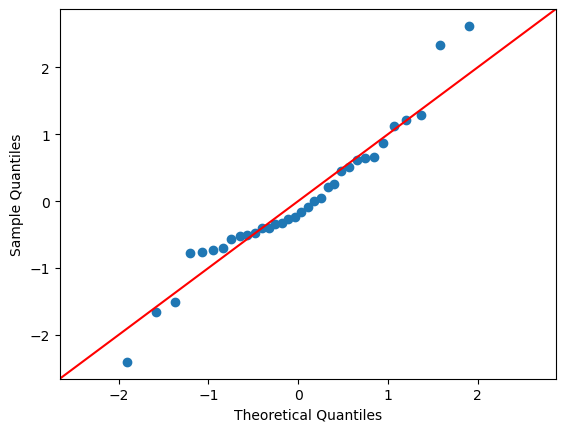

In [66]:
import statsmodels.api as sm
sm.qqplot(data1["residuals"], line="45", fit=True)
plt.show()

<Axes: xlabel='residuals', ylabel='Count'>

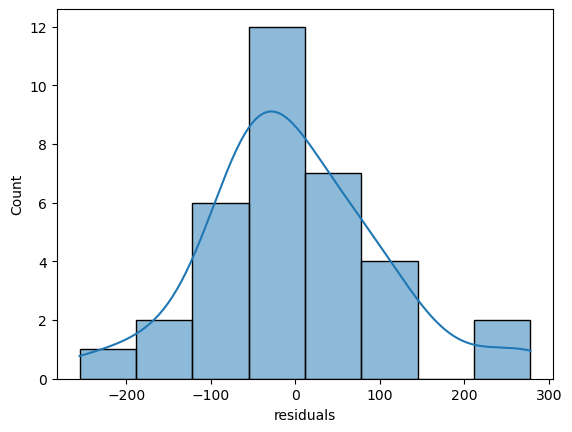

In [68]:
sns.histplot(data1["residuals"], kde=True)

### Observations:
* The data points are seen to closely follow the reference line of normality
* Hence the residuals are approximately npormally distributed as also can be seen from the kde distribution